In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [132]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(df.shape)
print(df.head())


(1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLeve

In [133]:

df.drop(["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"], axis=1, inplace=True)

df["Attrition"] = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

# Encode categoricals
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])


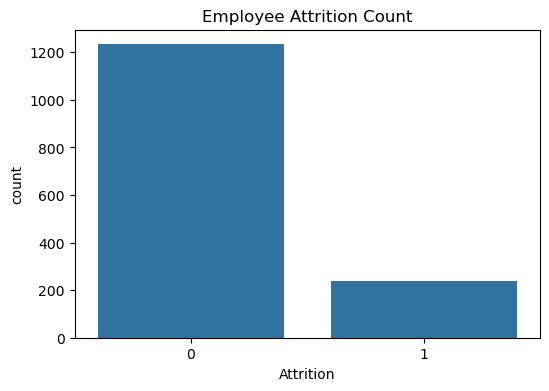

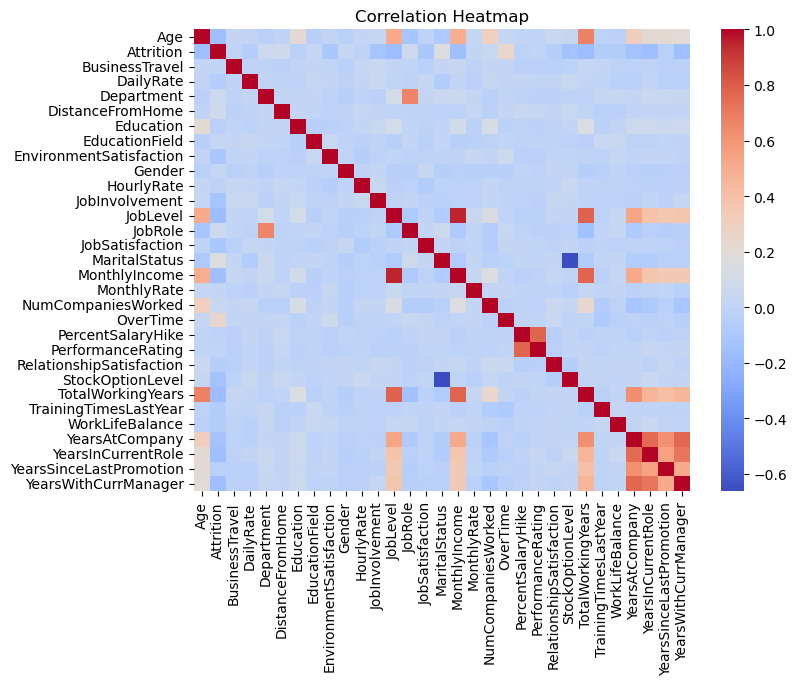

In [134]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Attrition")
plt.title("Employee Attrition Count")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


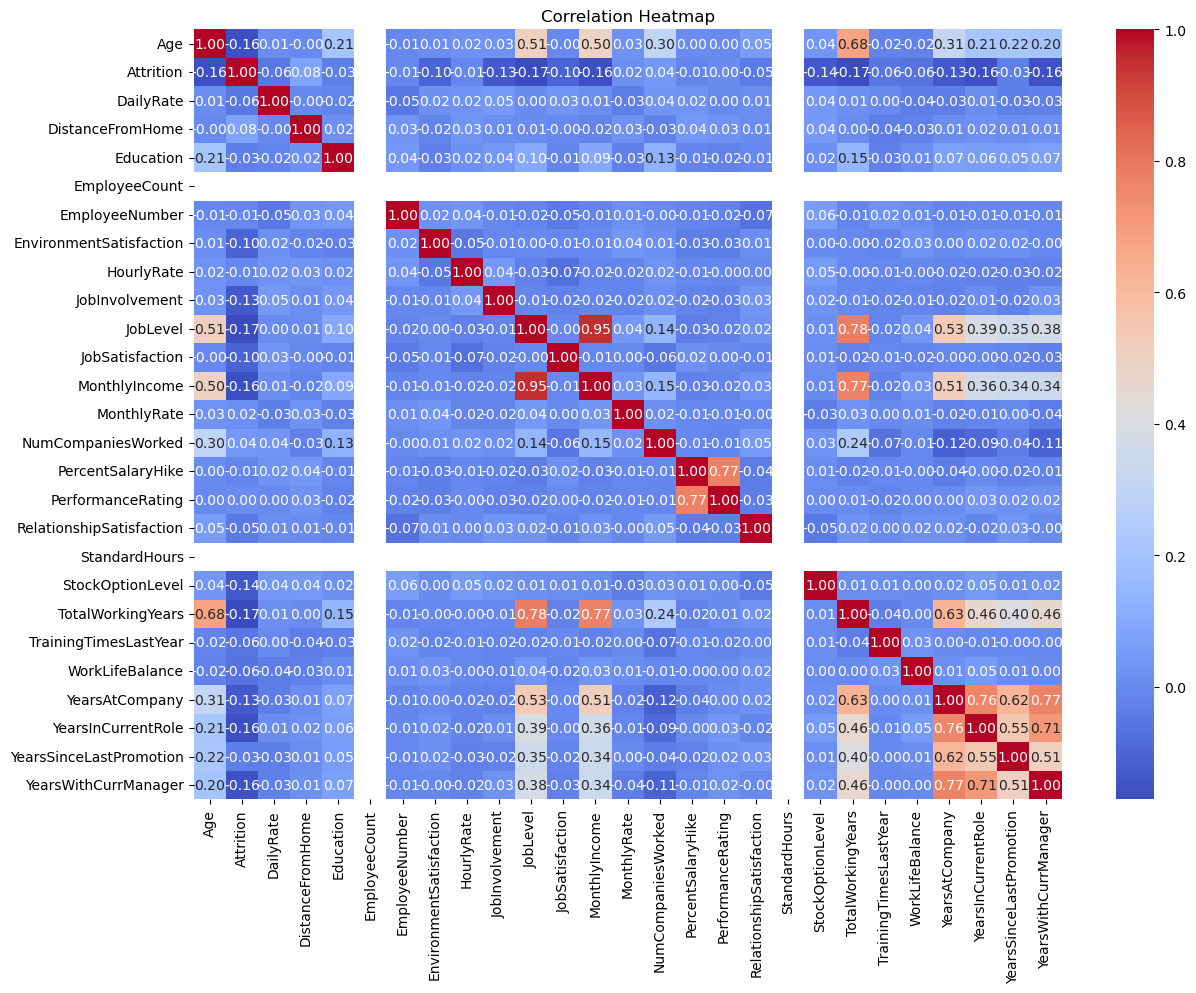

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df_encoded = df.copy()
df_encoded['Attrition'] = df_encoded['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
corr = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png", dpi=60, bbox_inches='tight')  
plt.show()


In [136]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Split features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Convert categorical columns to numeric using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Now scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [138]:
# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Logistic Regression Report:
               precision    recall  f1-score   support

          No       0.88      0.96      0.92       247
         Yes       0.60      0.32      0.42        47

    accuracy                           0.86       294
   macro avg       0.74      0.64      0.67       294
weighted avg       0.84      0.86      0.84       294

Random Forest Report:
               precision    recall  f1-score   support

          No       0.85      0.97      0.91       247
         Yes       0.36      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.61      0.53      0.52       294
weighted avg       0.77      0.83      0.78       294



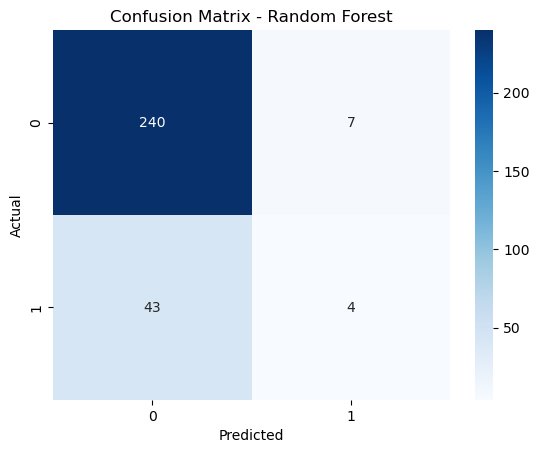

In [139]:
# Predict
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [140]:
plt.savefig("Confusion Matrix - Random Forest.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [141]:
feat_names = [f"Feature_{i}" for i in range(X_train.shape[1])]


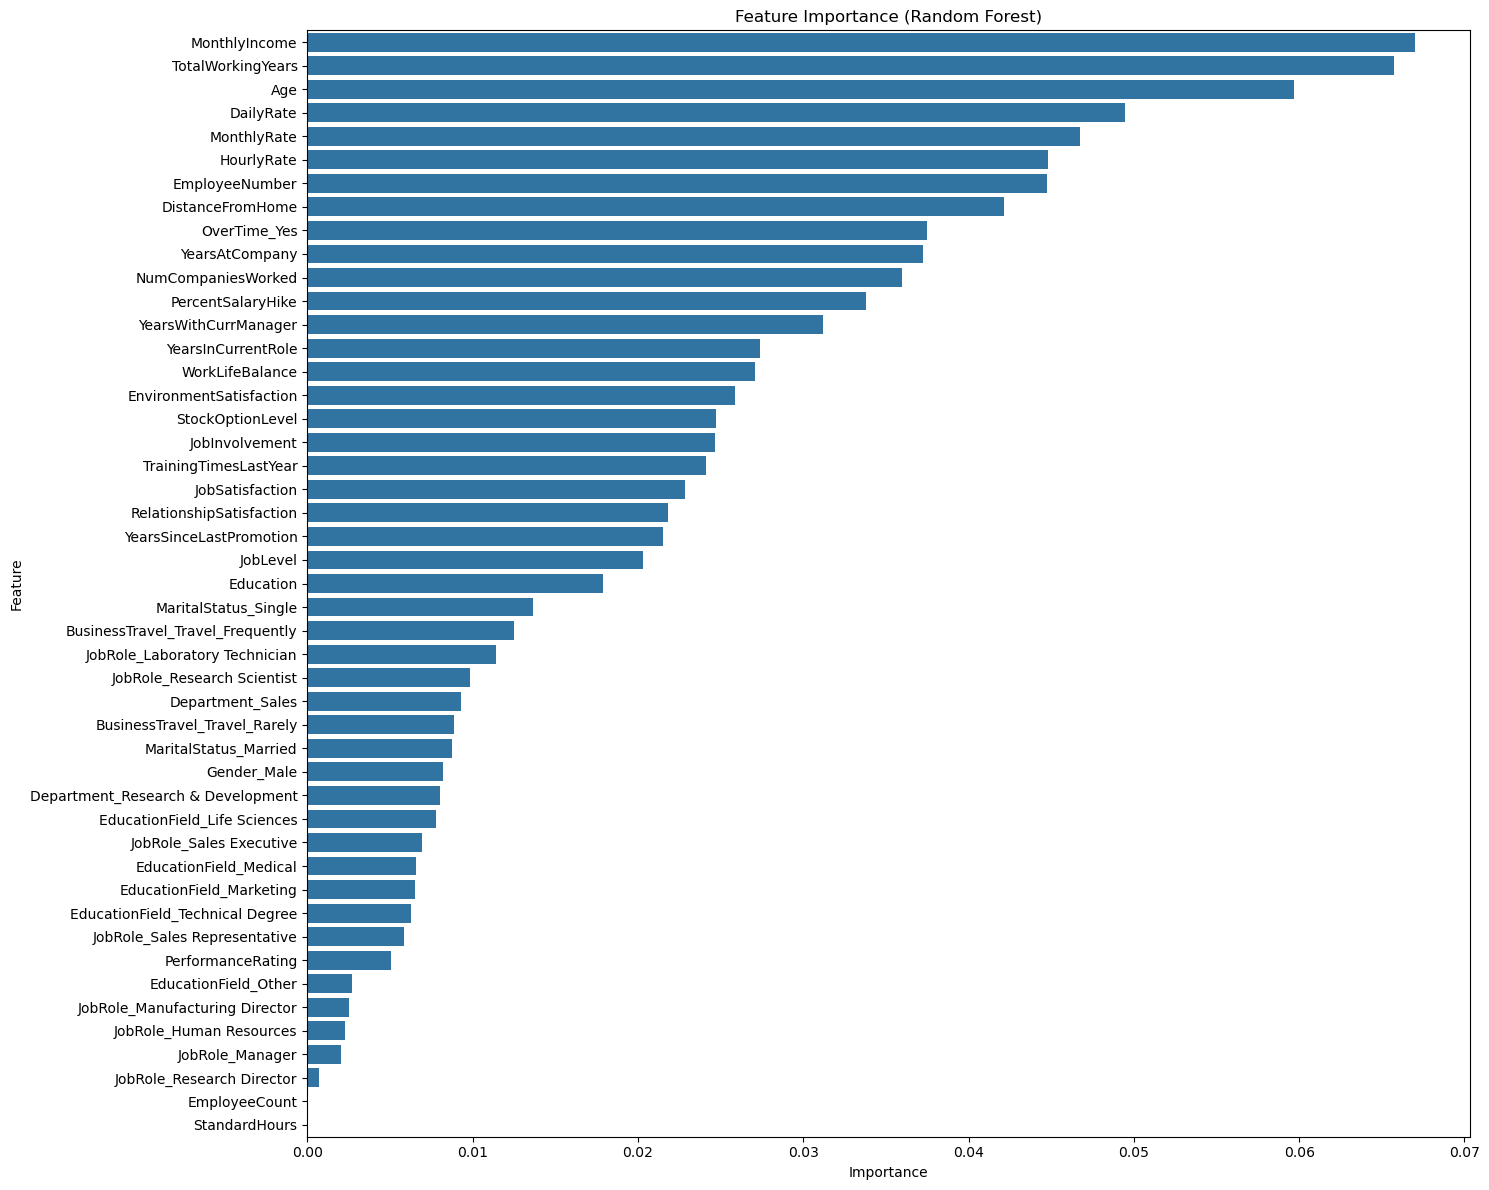

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


feat_names = X_encoded.columns 

importances = rf_model.feature_importances_

imp_df = pd.DataFrame({
    "Feature": feat_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(15,12))
sns.barplot(x="Importance", y="Feature", data=imp_df)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.savefig("feature_importance_rf.png")  # Saves the image
plt.show()


In [143]:
plt.savefig("Feature Importance -Random Forest.png")


<Figure size 640x480 with 0 Axes>

In [144]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.8571428571428571
Random Forest Accuracy: 0.8299319727891157
